#Импорт необходимых библиотек датасета Cifar10

In [19]:
from tensorflow.keras.datasets import cifar10
from tensorflow import keras as k
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

// Вспомогательные функции //

In [54]:
def print_fit_plt(hist):
    history_dict = hist.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['accuracy']  # исправлено с 'acc' на 'accuracy'
    val_accuracy = history_dict['val_accuracy']  # исправлено с 'val_acc' на 'val_accuracy'

    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the model accuracy vs Epochs
    ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    ax[0].set_title('Training & Validation Accuracy', fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('Accuracy', fontsize=16)
    ax[0].legend()

    # Plot the loss vs Epochs
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
    ax[1].set_title('Training & Validation Loss', fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('Loss', fontsize=16)
    ax[1].legend()
    plt.show()

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Нормирование данных для эффективности обучения

In [3]:
x_train = x_train/255
x_test = x_test/255

#1 MLP

##Cтруктура



*   3 полносвязных скрытых слоя с уменьшением количества нейронов




In [12]:
mlp_model = k.Sequential([
    k.layers.Dense(256, activation='relu', input_shape = (32,32,3)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Flatten(),
    k.layers.Dense(10, activation='softmax')
])

mlp_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 32, 32, 256)         │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32, 32, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32, 32, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │         655,370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 697,546 (2.66 MB)

 Trainable params: 697,546 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

##Обучение



*   При остановке earlyStop`ом сохраняются лучшие веса исходя из значения функции потерь на валидационной выборке



In [20]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

hist1 = mlp_model.fit(x_train, y_train, epochs = 30, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - acc: 0.5621 - loss: 1.2665 - val_acc: 0.4799 - val_loss: 1.5097
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - acc: 0.5851 - loss: 1.2001 - val_acc: 0.4828 - val_loss: 1.5247
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - acc: 0.6051 - loss: 1.1434 - val_acc: 0.4768 - val_loss: 1.5670
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - acc: 0.6370 - loss: 1.0600 - val_acc: 0.4667 - val_loss: 1.6349
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - acc: 0.6613 - loss: 0.9903 - val_acc: 0.4646 - val_loss: 1.7409
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.6891 - loss: 0.9155 - val_acc: 0.4565 - val_loss: 1.8141
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - acc: 0.7088 - loss: 0.8523 - val_acc: 0.4457 - val_loss: 1.9250
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7379 - loss: 0.7769 - val_acc: 0.4392 - val_loss: 2.0408
Epoch 9/30
1250/1250 ━━━━━━━━━━



*   Эксперемент с добавлением Dropout слоёв




In [21]:
mlp_model2 = k.Sequential([
    k.layers.Dense(256, activation='relu', input_shape = (32,32,3)),
    k.layers.Dropout(0.3),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),
    k.layers.Dense(64, activation='relu'),
    k.layers.Flatten(),
    k.layers.Dense(10, activation='softmax')
])

mlp_model2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

hist2 = mlp_model2.fit(x_train, y_train, epochs = 30, validation_split = 0.2, callbacks = early_stopping)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - acc: 0.3508 - loss: 1.8105 - val_acc: 0.4535 - val_loss: 1.5553
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - acc: 0.4790 - loss: 1.4791 - val_acc: 0.4803 - val_loss: 1.4806
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.5132 - loss: 1.3917 - val_acc: 0.4886 - val_loss: 1.4755
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.5406 - loss: 1.3320 - val_acc: 0.4846 - val_loss: 1.4997
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - acc: 0.5531 - loss: 1.2910 - val_acc: 0.4849 - val_loss: 1.4929
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - acc: 0.5722 - loss: 1.2289 - val_acc: 0.4706 - val_loss: 1.5398
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - acc: 0.5989 - loss: 1.1625 - val_acc: 0.4828 - val_loss: 1.5432
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - acc: 0.6191 - loss: 1.1061 - val_acc: 0.4763 - val_loss: 1.6106
Epoch 9/30
1250/1250 ━━━

##Тестирование

In [22]:
mlp_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.4800 - loss: 1.4930


[1.4855546951293945, 0.4799000024795532]

In [23]:
mlp_model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.4880 - loss: 1.4602


[1.4519119262695312, 0.49230000376701355]

##Вывод

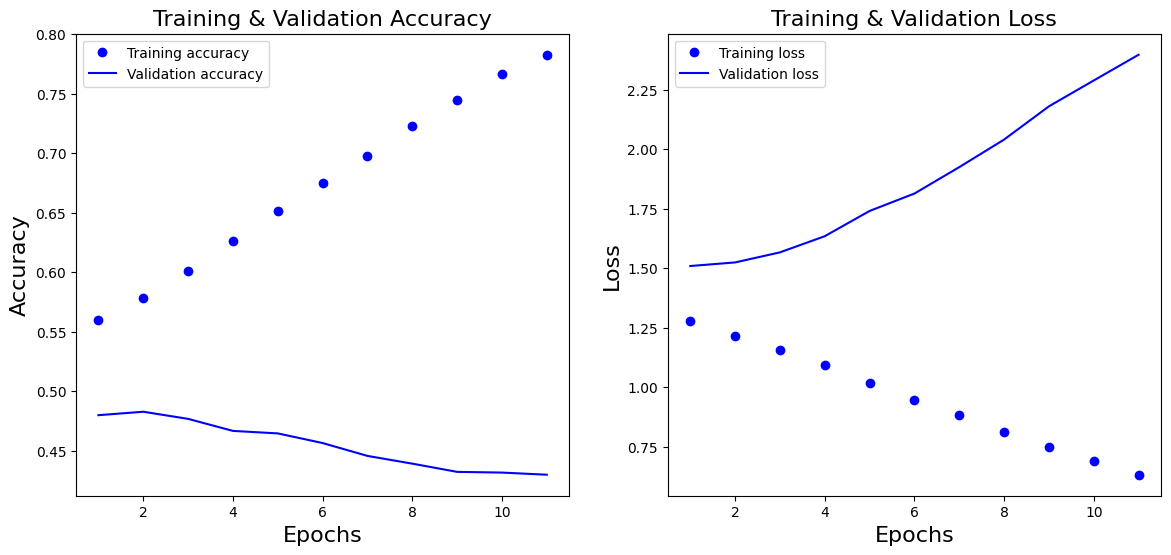

In [26]:
print_fit_plt(hist1)

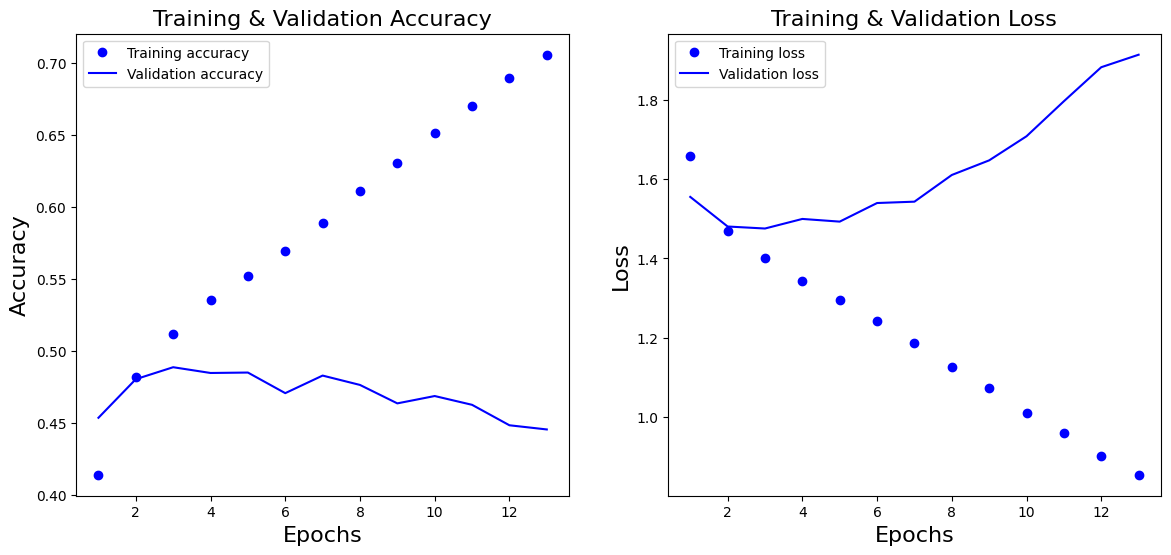

In [27]:
print_fit_plt(hist2)



*   Важность нормализации:

    изначально в обе модели были поданы не нормализованные данные. Метрики были в разы хуже.
*   MLP сильно склонна к переобучению:

    Добавление dropout слоёев дало прирост качества предсказаний. На графиках видно, что без слоев регуляризации модель сразу же переобучается.



#CNN

##Архитектира


*   Чередующиеся слои пуллинга и свертки с увеличением количества фильтров

*   padding`и, сохраняющие информативность каждой карты признаков

*   3 полносвязных слоя для наибольшей точности классификации






In [34]:
cnn_model = k.Sequential([
    k.layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = (32,32,3)),
    k.layers.MaxPooling2D(pool_size=(3,3)),
    k.layers.Conv2D(64, 3, activation = 'relu', padding = 'same'),
    k.layers.MaxPooling2D(),
    k.layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    k.layers.MaxPooling2D(),
    k.layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    k.layers.MaxPooling2D(),
    k.layers.Flatten(),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.5),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax')
])

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,218 (1.64 MB)

 Trainable params: 430,218 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

##Обучение

In [35]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])


hist = cnn_model.fit(x_train, y_train, epochs = 30, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - acc: 0.2306 - loss: 1.9933 - val_acc: 0.4929 - val_loss: 1.3668
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.4907 - loss: 1.3789 - val_acc: 0.5205 - val_loss: 1.3239
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.5845 - loss: 1.1779 - val_acc: 0.6110 - val_loss: 1.0913
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.6309 - loss: 1.0417 - val_acc: 0.6466 - val_loss: 1.0024
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.6717 - loss: 0.9387 - val_acc: 0.6641 - val_loss: 0.9713
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.7033 - loss: 0.8552 - val_acc: 0.6692 - val_loss: 0.9701
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.7266 - loss: 0.7945 - val_acc: 0.6863 - val_loss: 0.9099
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.7479 - loss: 0.7244 - val_acc: 0.6943 - val_loss: 0.9323
Epoch 9/30
1250/1250 ━━━━━━━━━━━━━━━━

##Тестирование

In [36]:
cnn_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6826 - loss: 0.9183


[0.9268808364868164, 0.6780999898910522]

##Вывод

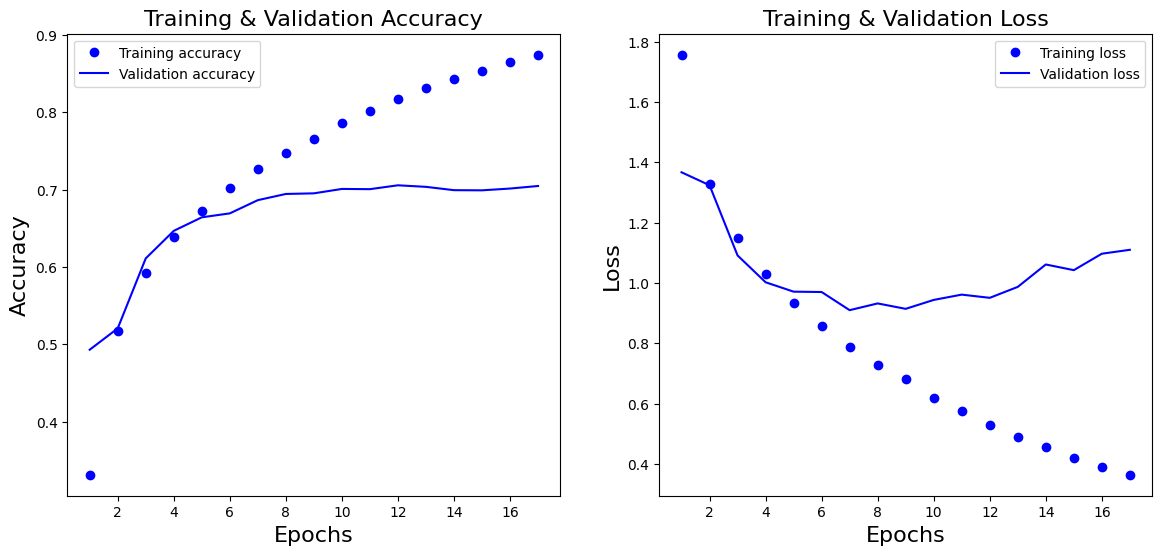

In [37]:
print_fit_plt(hist)



*   Cверточная нейронная сеть показала лучшие по сравнению с полносвязной результаты.
*   Она не так склонна к переобучению, как MLP.



#Transfer learning

##Архитектира


*   За основу взята модель MobileNetV2 в качестве экструдера признаков.



###Использование модели в качестве экструдера признаков (использование изначальных весов). Для повышения качества классификации - 2 полносвязных скрытых слоя.

In [41]:
base_model = k.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False
MNV = k.Sequential([
    base_model,
    k.layers.GlobalAveragePooling2D(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax')
])

<ipython-input-41-c6f3698c4601>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = k.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


##Обучение

In [42]:
MNV.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = MNV.fit(x_train, y_train, epochs = 30, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.2446 - loss: 2.0557 - val_accuracy: 0.3233 - val_loss: 1.8572
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3139 - loss: 1.8675 - val_accuracy: 0.3442 - val_loss: 1.8193
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3311 - loss: 1.8284 - val_accuracy: 0.3479 - val_loss: 1.8089
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3441 - loss: 1.8011 - val_accuracy: 0.3470 - val_loss: 1.7995
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3491 - loss: 1.7856 - val_accuracy: 0.3453 - val_loss: 1.7966
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3589 - loss: 1.7673 - val_accuracy: 0.3539 - val_loss: 1.7887
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3632 - loss: 1.7486 - val_accuracy: 0.3579 - val_loss: 1.7799
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3598 - loss: 1

##Тестирование

In [43]:
MNV.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3544 - loss: 1.7818


[1.7874239683151245, 0.35260000824928284]

##Архитектира

###Использование только архитектуры модели (полное переобучение, расчет весов).

In [57]:
base_model = k.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = True
MNV2 = k.Sequential([
    base_model,
    k.layers.GlobalAveragePooling2D(),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.3),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax')
])

<ipython-input-57-8cd0a20b3a15>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = k.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


##Обучение

In [59]:
from tensorflow.keras.optimizers import Adam

In [60]:
MNV2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist2 = MNV2.fit(x_train, y_train, epochs = 30, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 24ms/step - accuracy: 0.2320 - loss: 2.2191 - val_accuracy: 0.2364 - val_loss: 2.1032
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 57s 15ms/step - accuracy: 0.5057 - loss: 1.4348 - val_accuracy: 0.5764 - val_loss: 1.3992
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5879 - loss: 1.2052 - val_accuracy: 0.6549 - val_loss: 1.0681
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6382 - loss: 1.0638 - val_accuracy: 0.6961 - val_loss: 0.8953
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.6810 - loss: 0.9524 - val_accuracy: 0.7070 - val_loss: 0.8589
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7128 - loss: 0.8544 - val_accuracy: 0.7306 - val_loss: 0.7840
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7318 - loss: 0.7895 - val_accuracy: 0.7407 - val_loss: 0.7643
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7530 -

##Тестирование

In [61]:
MNV2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7942 - loss: 0.6616


[0.6651257872581482, 0.7907000184059143]

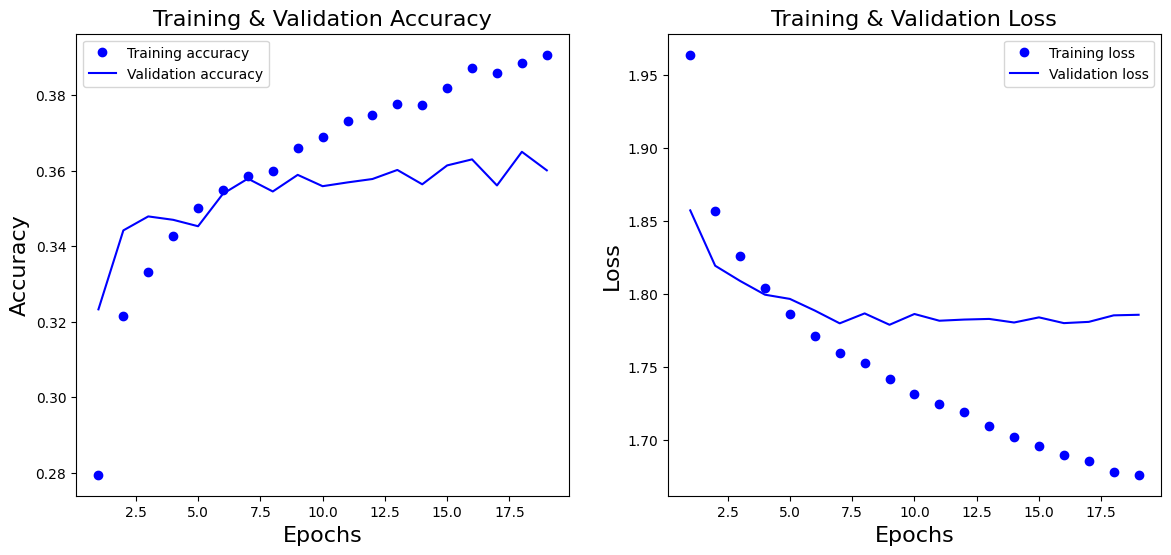

In [55]:
print_fit_plt(hist)

График ниже - визуализация обучения модели MNV2 без указания learning_rate = 0.0001. Показатели на валидационной выборке нестабильны, поэтому было принято решение понизить learning_rate.

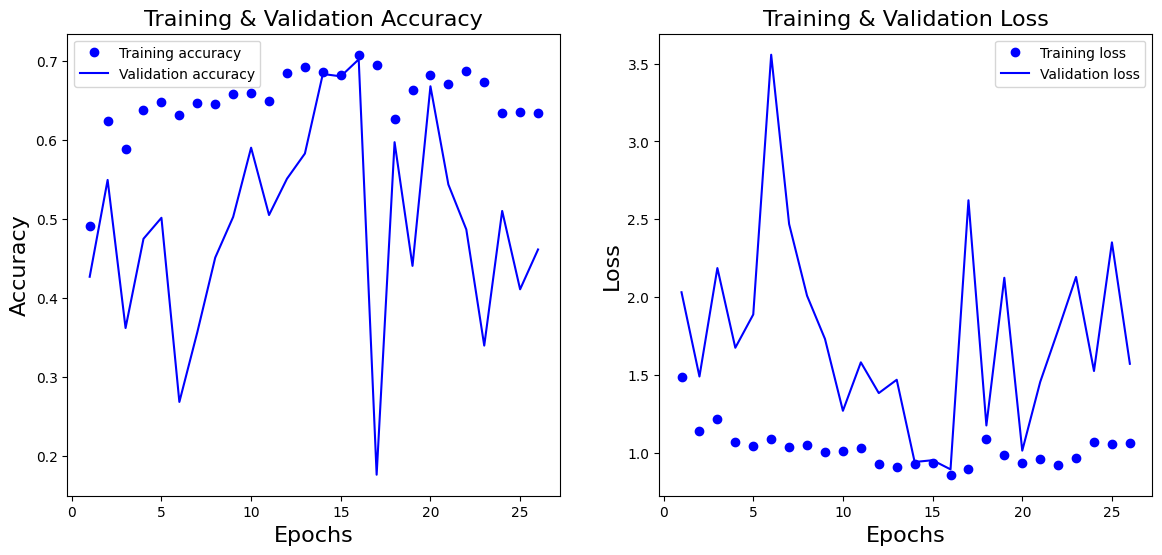

In [56]:
print_fit_plt(hist2)

График ниже - вызуализация обучения той же модели, но с пониженным lr (learning_rate = 0.0001)

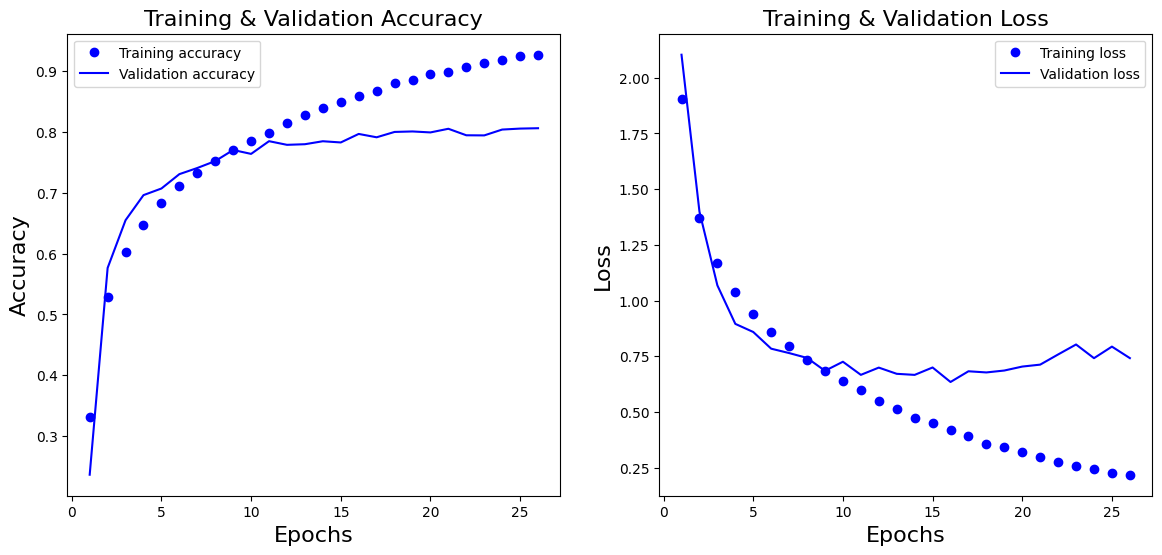

In [62]:
print_fit_plt(hist2)

##Вывод
Изначально модель MobileNetV2 не подходит для классификации данных Cifar10, однако, использовав ее структуру, понизив learning rate и полностью переобучив ее на данном датасете, можно добиться хорошоего качества классификации.

#Итоги
Самой эффективной моделью оказалась MobileNetV2 с измененными весами (асс = 0.79). Приемлемый результат показала самописная CNN модель (асс = 0.67). MLP проявили склонность к переобучению, использование dropout регуляризации дало несущественный прирост точности (0.47/0.49).

Можно сделать вывод - сверточные нейронные сети качественнее справляются с задачей классификации изображений.